<a href="https://colab.research.google.com/github/CodeElevate-afk/customer-support/blob/main/face_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install Required Libraries

In [1]:
!pip install opencv-python-headless deepface tensorflow matplotlib --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.7 MB/s eta 0:00:00


# Step 2: Capture Image from Webcam in Colab

In [72]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
import cv2
import numpy as np
import PIL.Image
import io
import base64
import matplotlib.pyplot as plt

def capture_image():
    js = Javascript('''
        async function takePhoto() {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          div.appendChild(video);
          document.body.appendChild(div);

          const stream = await navigator.mediaDevices.getUserMedia({ video: true });
          video.srcObject = stream;
          await video.play();

          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(track => track.stop());
          div.remove();

          return canvas.toDataURL('image/jpeg');
        }
        takePhoto();
    ''')
    display(js)
    data = eval_js("takePhoto()")
    binary = base64.b64decode(data.split(',')[1])
    img = PIL.Image.open(io.BytesIO(binary))
    img.save("captured_face.jpg")
    return "captured_face.jpg"

image_path = capture_image()

<IPython.core.display.Javascript object>

# Step 3: Detect and Crop the Face Only

In [73]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

if len(faces) == 0:
    print("⚠️ No face detected. Displaying original image. Proceeding with full image analysis.")
    face_img = img
else:
    (x, y, w, h) = faces[0]
    padding = 30
    x = max(x - padding, 0)
    y = max(y - padding, 0)
    w = min(w + 2 * padding, img.shape[1] - x)
    h = min(h + 2 * padding, img.shape[0] - y)
    face_img = img[y:y+h, x:x+w]

cv2.imwrite("cropped_face.jpg", face_img)

True

# Step 4: Face Analysis (Age + Emotion)

In [74]:
from deepface import DeepFace

result = DeepFace.analyze(img_path="cropped_face.jpg", actions=['age', 'emotion'], enforce_detection=False)
age = result[0]['age']
emotion = result[0]['dominant_emotion']

print("Estimated Age:", age)
print("Dominant Emotion:", emotion)

Action: emotion: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

Estimated Age: 26
Dominant Emotion: fear


# Step 6: AI-Based Advice System

In [75]:
advice = []

# Age-Based

In [76]:
if age < 25:
    advice.append("Use gentle cleansers like Cetaphil or Himalaya Neem Face Wash.")
elif age < 45:
    advice.append("Use retinol creams like Olay Retinol24 for anti-aging.")
else:
    advice.append("Apply anti-wrinkle creams like L'Oreal Revitalift or Vitamin E serums.")


# Pimple/Scar-Based

In [77]:
if pimple_count > 10:
    advice.append("Use salicylic acid cream (e.g., Sebamed Clear Face) and avoid oily food.")
elif 5 < pimple_count <= 10:
    advice.append("Apply benzoyl peroxide gel (e.g., Brevoxyl) once daily.")
elif pimple_count > 0:
    advice.append("Use tea tree oil based face wash for mild acne.")
else:
    advice.append("No acne visible. Maintain hydration and skin hygiene.")

# Emotion-Based

In [78]:
if emotion == "sad":
    advice.append("Drink water, sleep well, and use vitamin C serum for skin glow.")
elif emotion == "angry":
    advice.append("Avoid spicy food and apply aloe vera gel to cool skin.")
elif emotion == "happy":
    advice.append("You look great! Maintain your skincare routine.")

print("\n🩺 Final Skin Advice:")
for line in advice:
    print("•", line)


🩺 Final Skin Advice:
• Use retinol creams like Olay Retinol24 for anti-aging.
• Use salicylic acid cream (e.g., Sebamed Clear Face) and avoid oily food.


# Optional: Visualize Detected Spots (Debug)

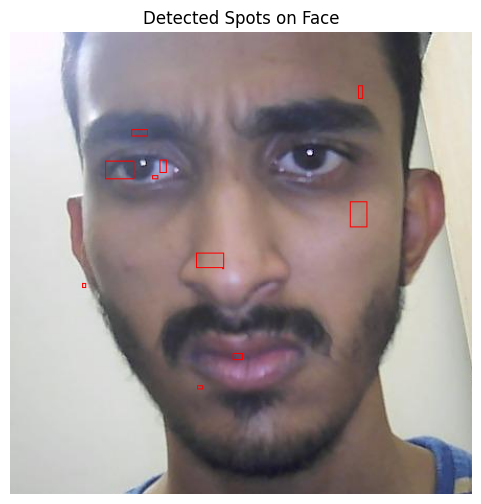

In [82]:
face_display = face_img.copy()
for cnt in contours:
    if cv2.contourArea(cnt) < 300:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(face_display, (x, y), (x+w, y+h), (0, 0, 255), 1)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(face_display, cv2.COLOR_BGR2RGB))
plt.title("Detected Spots on Face")
plt.axis('off')
plt.show()
